# Exploratory Data Analysis (EDA) for Credit Risk Assessment

## Project Overview
This notebook performs comprehensive exploratory data analysis on transaction data to understand patterns, relationships, and data quality for credit risk modeling. The analysis focuses on identifying key features that could serve as proxies for creditworthiness assessment.

## Objectives
- Understand the structure and quality of the dataset
- Identify patterns in customer transaction behavior
- Analyze distributions of numerical and categorical features
- Detect correlations and relationships between variables
- Generate insights for feature engineering and model development

---

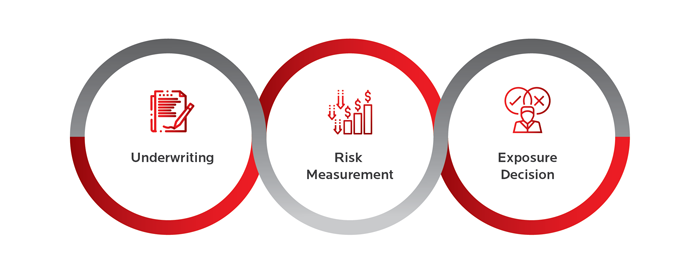

## 1. Environment Setup and Library Imports

Setting up the analysis environment with essential libraries for data manipulation, visualization, and statistical analysis.

In [1]:
# Core data manipulation and analysis libraries
import pandas as pd
import numpy as np

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Utility libraries
import warnings
from datetime import datetime

# Configure visualization settings
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
warnings.filterwarnings('ignore')

# Configure pandas display options for better readability
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

print("✅ Libraries imported successfully!")
print("📊 Visualization environment configured")
print("🔧 Analysis environment ready")

✅ Libraries imported successfully!
📊 Visualization environment configured
🔧 Analysis environment ready


## 2. Data Loading and Initial Inspection

Loading the transaction dataset and performing initial inspection to understand the basic structure and characteristics of the data.

In [2]:
def load_data(file_path):
    """
    Load transaction data from CSV file with error handling
    
    Parameters:
    file_path (str): Path to the CSV file
    
    Returns:
    pandas.DataFrame: Loaded dataset or None if loading fails
    """
    try:
        df = pd.read_csv(file_path)
        print(f"📁 Data loaded successfully!")
        print(f"📏 Dataset shape: {df.shape}")
        print(f"💾 Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
        return df
    except FileNotFoundError:
        print(f"❌ File not found: {file_path}")
        print("📝 Please ensure you have downloaded the data and placed it in the correct directory.")
        return None
    except Exception as e:
        print(f"❌ Error loading data: {str(e)}")
        return None

# Load the dataset
data_path = "../data/raw/data.csv"  # Adjust path as needed
df = load_data(data_path)

if df is not None:
    print("\n" + "="*60)
    print("📊 DATASET OVERVIEW")
    print("="*60)
    print(f"📋 Dataset dimensions: {df.shape[0]:,} rows × {df.shape[1]} columns")
    print(f"💾 Memory footprint: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
    print(f"📅 Analysis date: {datetime.now().strftime('%Y-%m-%d %H:%M')}")

📁 Data loaded successfully!
📏 Dataset shape: (95662, 16)
💾 Memory usage: 66.48 MB

📊 DATASET OVERVIEW
📋 Dataset dimensions: 95,662 rows × 16 columns
💾 Memory footprint: 66.48 MB
📅 Analysis date: 2025-06-28 19:59


## 3. Data Structure and Schema Analysis

Comprehensive analysis of the dataset structure including data types, column information, and sample data preview.

In [3]:
def explore_data_structure(df):
    """
    Perform comprehensive data structure analysis
    
    Parameters:
    df (pandas.DataFrame): Input dataset
    
    Returns:
    pandas.DataFrame: Input dataset for method chaining
    """
    print("🔍 DATA STRUCTURE ANALYSIS")
    print("="*60)
    
    print("\n📋 1. Dataset Information:")
    print("-" * 40)
    print(df.info())
    
    print("\n📊 2. Data Types Distribution:")
    print("-" * 40)
    dtype_counts = df.dtypes.value_counts()
    for dtype, count in dtype_counts.items():
        print(f"  {dtype}: {count} columns")
    
    print("\n👀 3. Sample Data Preview:")
    print("-" * 40)
    display(df.head())
    
    print("\n📏 4. Dataset Dimensions:")
    print("-" * 40)
    print(f"  📊 Total rows: {df.shape[0]:,}")
    print(f"  📋 Total columns: {df.shape[1]}")
    print(f"  🧮 Total data points: {df.shape[0] * df.shape[1]:,}")
    
    return df

if df is not None:
    df = explore_data_structure(df)

🔍 DATA STRUCTURE ANALYSIS

📋 1. Dataset Information:
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95662 non-null  object 
 1   BatchId               95662 non-null  object 
 2   AccountId             95662 non-null  object 
 3   SubscriptionId        95662 non-null  object 
 4   CustomerId            95662 non-null  object 
 5   CurrencyCode          95662 non-null  object 
 6   CountryCode           95662 non-null  int64  
 7   ProviderId            95662 non-null  object 
 8   ProductId             95662 non-null  object 
 9   ProductCategory       95662 non-null  object 
 10  ChannelId             95662 non-null  object 
 11  Amount                95662 non-null  float64
 12  Value                 95662 non-null  int64  
 13  TransactionStartTime  95662

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0



📏 4. Dataset Dimensions:
----------------------------------------
  📊 Total rows: 95,662
  📋 Total columns: 16
  🧮 Total data points: 1,530,592


## 4. Statistical Summary and Feature Classification

Generating comprehensive summary statistics for both numerical and categorical features to understand data distributions and characteristics.

In [4]:
def generate_summary_statistics(df):
    """
    Generate comprehensive summary statistics for all feature types
    
    Parameters:
    df (pandas.DataFrame): Input dataset
    
    Returns:
    tuple: Lists of numerical and categorical column names
    """
    print("📈 STATISTICAL SUMMARY ANALYSIS")
    print("="*60)
    
    # Identify feature types
    numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
    datetime_cols = df.select_dtypes(include=['datetime64']).columns.tolist()
    
    print(f"\n🔢 Feature Type Distribution:")
    print("-" * 40)
    print(f"  Numerical features: {len(numerical_cols)}")
    print(f"  Categorical features: {len(categorical_cols)}")
    print(f"  DateTime features: {len(datetime_cols)}")
    
    # Numerical features analysis
    print(f"\n📊 1. Numerical Features Summary:")
    print("-" * 40)
    if numerical_cols:
        numerical_summary = df[numerical_cols].describe()
        display(numerical_summary)
        
        print("\n🎯 Key Numerical Insights:")
        for col in numerical_cols[:3]:  # Show insights for first 3 numerical columns
            stats = df[col].describe()
            print(f"  • {col}: Range [{stats['min']:.2f}, {stats['max']:.2f}], Mean: {stats['mean']:.2f}")
    else:
        print("  ⚠️ No numerical columns found.")
    
    # Categorical features analysis
    print(f"\n🏷️ 2. Categorical Features Summary:")
    print("-" * 40)
    
    if categorical_cols:
        print(f"\n📋 Analyzing {len(categorical_cols)} categorical features:")
        
        categorical_summary = []
        for col in categorical_cols:
            unique_count = df[col].nunique()
            most_common = df[col].mode().iloc[0] if not df[col].mode().empty else 'N/A'
            most_common_count = df[col].value_counts().iloc[0] if not df[col].value_counts().empty else 0
            
            categorical_summary.append({
                'Column': col,
                'Unique_Values': unique_count,
                'Most_Common': most_common,
                'Most_Common_Count': most_common_count,
                'Most_Common_Percentage': (most_common_count / len(df)) * 100
            })
        
        cat_summary_df = pd.DataFrame(categorical_summary)
        display(cat_summary_df)
        
    else:
        print("  ⚠️ No categorical columns found.")
    
    return numerical_cols, categorical_cols

if df is not None:
    numerical_cols, categorical_cols = generate_summary_statistics(df)

📈 STATISTICAL SUMMARY ANALYSIS

🔢 Feature Type Distribution:
----------------------------------------
  Numerical features: 5
  Categorical features: 11
  DateTime features: 0

📊 1. Numerical Features Summary:
----------------------------------------


,CountryCode,Amount,Value,PricingStrategy,FraudResult
count,95662.0,9.566200e+04,9.566200e+04,95662.000000,95662.000000
mean,256.0,6.717846e+03,9.900584e+03,2.255974,0.002018
std,0.0,1.233068e+05,1.231221e+05,0.732924,0.044872
min,256.0,-1.000000e+06,2.000000e+00,0.000000,0.000000
25%,256.0,-5.000000e+01,2.750000e+02,2.000000,0.000000
50%,256.0,1.000000e+03,1.000000e+03,2.000000,0.000000
75%,256.0,2.800000e+03,5.000000e+03,2.000000,0.000000
max,256.0,9.880000e+06,9.880000e+06,4.000000,1.000000



🎯 Key Numerical Insights:
  • CountryCode: Range [256.00, 256.00], Mean: 256.00
  • Amount: Range [-1000000.00, 9880000.00], Mean: 6717.85
  • Value: Range [2.00, 9880000.00], Mean: 9900.58

🏷️ 2. Categorical Features Summary:
----------------------------------------

📋 Analyzing 11 categorical features:


,Column,Unique_Values,Most_Common,Most_Common_Count,Most_Common_Percentage
0,TransactionId,95662,TransactionId_1,1,0.001045
1,BatchId,94809,BatchId_67019,28,0.029270
2,AccountId,3633,AccountId_4841,30893,32.293910
3,SubscriptionId,3627,SubscriptionId_3829,32630,34.109678
4,CustomerId,3742,CustomerId_7343,4091,4.276515
5,CurrencyCode,1,UGX,95662,100.000000
6,ProviderId,6,ProviderId_4,38189,39.920763
7,ProductId,23,ProductId_6,32635,34.114905
8,ProductCategory,9,financial_services,45405,47.463988
9,ChannelId,4,ChannelId_3,56935,59.516841


## 5. Missing Values Assessment

Comprehensive analysis of missing values including identification, quantification, and visualization of missing data patterns.

In [5]:
def analyze_missing_values(df):
    """
    Comprehensive missing values analysis with visualizations
    
    Parameters:
    df (pandas.DataFrame): Input dataset
    
    Returns:
    pandas.DataFrame: Summary of missing values by column
    """
    print("🔍 MISSING VALUES ANALYSIS")
    print("="*60)
    
    # Calculate missing values statistics
    missing_data = pd.DataFrame({
        'Column': df.columns,
        'Missing_Count': df.isnull().sum(),
        'Missing_Percentage': (df.isnull().sum() / len(df)) * 100,
        'Data_Type': df.dtypes
    })
    
    # Filter and sort columns with missing values
    missing_data = missing_data[missing_data['Missing_Count'] > 0].sort_values('Missing_Percentage', ascending=False)
    
    # Overall missing data statistics
    total_missing = df.isnull().sum().sum()
    total_cells = df.shape[0] * df.shape[1]
    overall_missing_pct = (total_missing / total_cells) * 100
    
    print(f"\n📊 Overall Missing Data Statistics:")
    print("-" * 40)
    print(f"  Total missing values: {total_missing:,}")
    print(f"  Total data points: {total_cells:,}")
    print(f"  Overall missing percentage: {overall_missing_pct:.2f}%")
    
    if len(missing_data) > 0:
        print(f"\n❌ Columns with missing values ({len(missing_data)} columns):")
        print("-" * 40)
        display(missing_data)
        
        # Create visualizations for missing values
        fig, axes = plt.subplots(1, 2, figsize=(15, 6))
        
        # Missing values bar plot
        axes[0].bar(range(len(missing_data)), missing_data['Missing_Percentage'], 
                   color='coral', alpha=0.7, edgecolor='darkred')
        axes[0].set_xlabel('Columns with Missing Values')
        axes[0].set_ylabel('Missing Percentage (%)')
        axes[0].set_title('📊 Missing Values Distribution by Column')
        axes[0].set_xticks(range(len(missing_data)))
        axes[0].set_xticklabels(missing_data['Column'], rotation=45, ha='right')
        axes[0].grid(axis='y', alpha=0.3)
        
        # Add percentage labels on bars
        for i, v in enumerate(missing_data['Missing_Percentage']):
            axes[0].text(i, v + 0.5, f'{v:.1f}%', ha='center', va='bottom', fontweight='bold')
        
        # Missing values heatmap for subset of columns
        cols_to_plot = df.columns[:20] if len(df.columns) > 20 else df.columns
        missing_matrix = df[cols_to_plot].isnull()
        
        sns.heatmap(missing_matrix, cbar=True, yticklabels=False, 
                   cmap='Reds', xticklabels=True, ax=axes[1])
        axes[1].set_title('🔥 Missing Values Pattern (First 20 Columns)')
        axes[1].set_xlabel('Columns')
        plt.setp(axes[1].get_xticklabels(), rotation=45, ha='right')
        
        plt.tight_layout()
        plt.show()
        
        # Missing value impact assessment
        print(f"\n⚠️ Data Quality Impact Assessment:")
        print("-" * 40)
        high_missing_cols = missing_data[missing_data['Missing_Percentage'] > 20]
        medium_missing_cols = missing_data[(missing_data['Missing_Percentage'] > 5) & (missing_data['Missing_Percentage'] <= 20)]
        low_missing_cols = missing_data[missing_data['Missing_Percentage'] <= 5]
        
        print(f"  🔴 High missing (>20%): {len(high_missing_cols)} columns")
        print(f"  🟡 Medium missing (5-20%): {len(medium_missing_cols)} columns")
        print(f"  🟢 Low missing (≤5%): {len(low_missing_cols)} columns")
        
    else:
        print(f"\n✅ Excellent data quality - No missing values detected!")
        print("   💪 Dataset is complete and ready for analysis")
    
    return missing_data

if df is not None:
    missing_data = analyze_missing_values(df)

🔍 MISSING VALUES ANALYSIS

📊 Overall Missing Data Statistics:
----------------------------------------
  Total missing values: 0
  Total data points: 1,530,592
  Overall missing percentage: 0.00%

✅ Excellent data quality - No missing values detected!
   💪 Dataset is complete and ready for analysis


## 6. Numerical Features Distribution Analysis

Detailed analysis of numerical feature distributions including histograms, box plots for outlier detection, and statistical summaries.

📊 NUMERICAL FEATURES DISTRIBUTION ANALYSIS

🔢 Analyzing 5 numerical features:
📋 Features: CountryCode, Amount, Value, PricingStrategy, FraudResult

📈 1. Distribution Patterns:
----------------------------------------


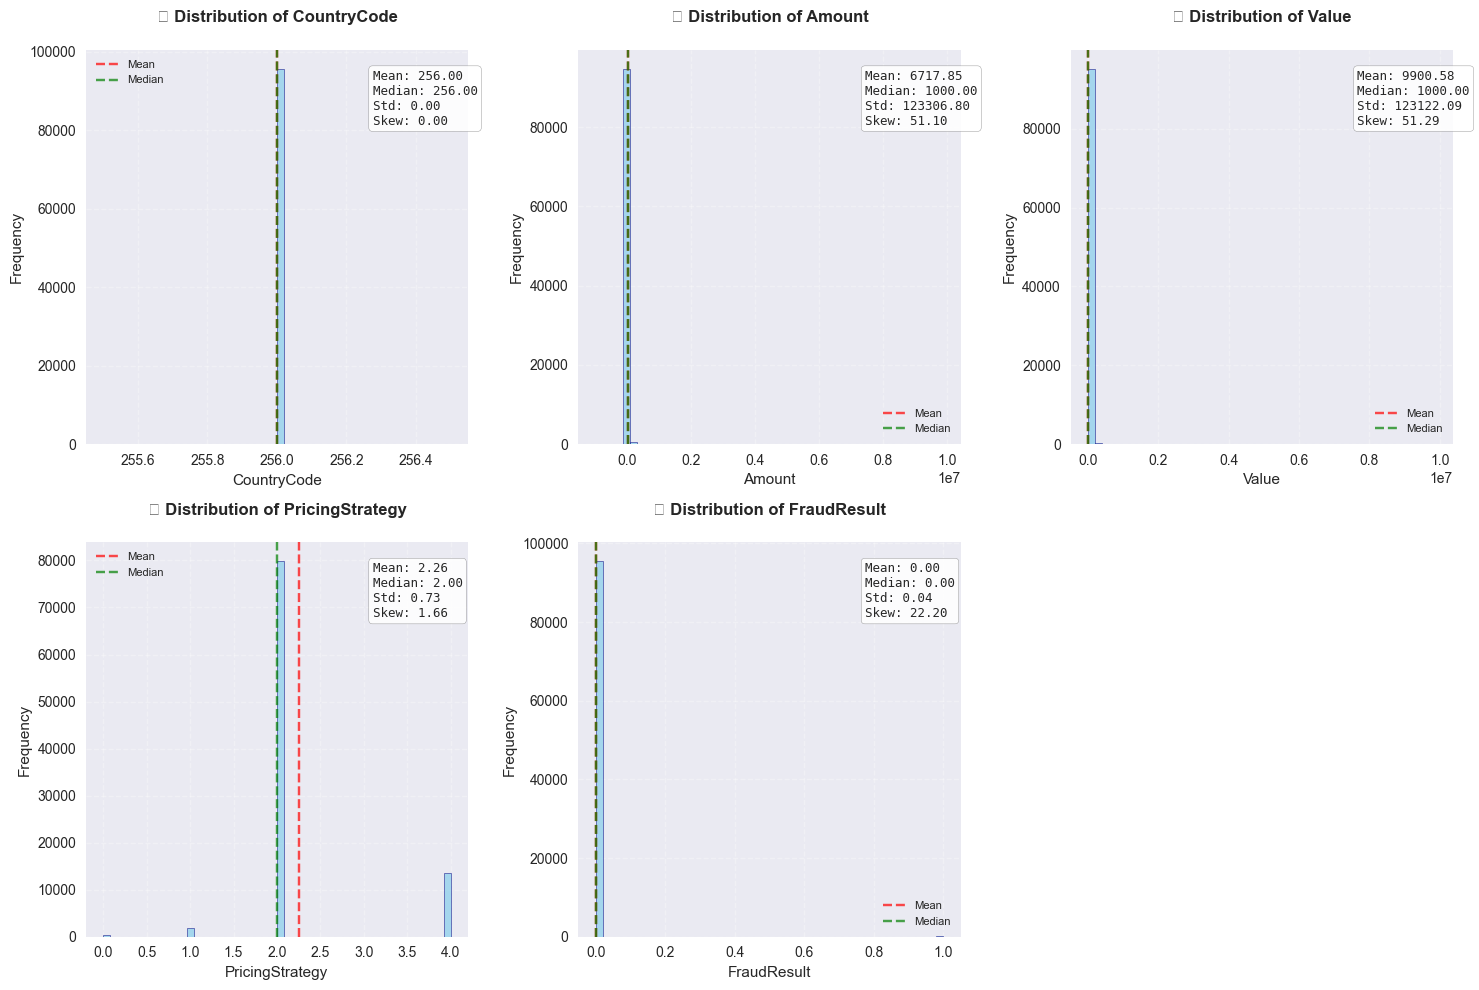


🎯 2. Outlier Detection Analysis:
----------------------------------------


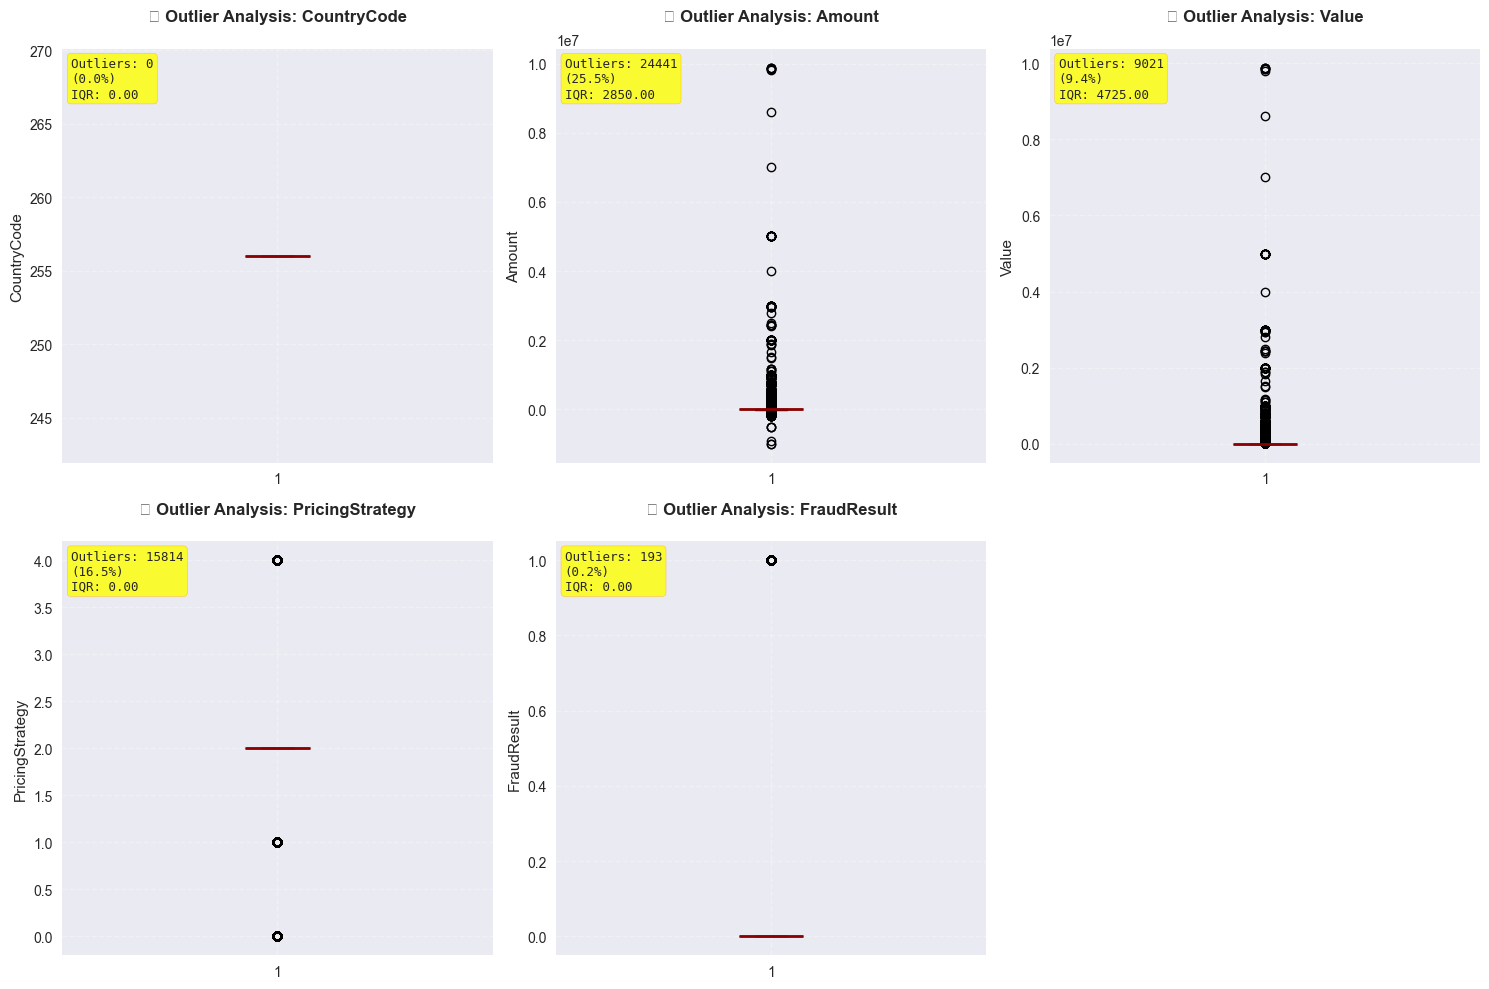


📋 Outlier Summary Report:
----------------------------------------


,Feature,Outlier_Count,Outlier_Percentage,Q1,Q3,IQR
0,CountryCode,0,0.000000,256.0,256.0,0.0
1,Amount,24441,25.549330,-50.0,2800.0,2850.0
2,Value,9021,9.430077,275.0,5000.0,4725.0
3,PricingStrategy,15814,16.531120,2.0,2.0,0.0
4,FraudResult,193,0.201752,0.0,0.0,0.0


In [6]:
def analyze_numerical_distributions(df, numerical_cols):
    """
    Analyze distributions of numerical features with comprehensive visualizations
    
    Parameters:
    df (pandas.DataFrame): Input dataset
    numerical_cols (list): List of numerical column names
    """
    print("📊 NUMERICAL FEATURES DISTRIBUTION ANALYSIS")
    print("="*60)
    
    if not numerical_cols:
        print("⚠️ No numerical columns found for analysis.")
        return
    
    print(f"\n🔢 Analyzing {len(numerical_cols)} numerical features:")
    print(f"📋 Features: {', '.join(numerical_cols)}")
    
    # Calculate subplot dimensions
    n_cols = len(numerical_cols)
    n_plot_cols = min(3, n_cols)
    n_rows = (n_cols + n_plot_cols - 1) // n_plot_cols
    
    # Distribution Analysis with Histograms
    print("\n📈 1. Distribution Patterns:")
    print("-" * 40)
    
    fig, axes = plt.subplots(n_rows, n_plot_cols, figsize=(15, 5*n_rows))
    if n_rows == 1:
        axes = [axes] if n_cols == 1 else axes
    else:
        axes = axes.flatten()
    
    for i, col in enumerate(numerical_cols):
        if i < len(axes):
            # Create histogram
            data_clean = df[col].dropna()
            axes[i].hist(data_clean, bins=50, alpha=0.7, color='skyblue', edgecolor='navy', linewidth=0.5)
            axes[i].set_title(f'📊 Distribution of {col}', fontweight='bold', pad=20)
            axes[i].set_xlabel(col)
            axes[i].set_ylabel('Frequency')
            axes[i].grid(alpha=0.3, linestyle='--')
            
            # Calculate and display statistics
            mean_val = data_clean.mean()
            median_val = data_clean.median()
            std_val = data_clean.std()
            skew_val = data_clean.skew()
            
            # Add statistics annotation
            stats_text = f'Mean: {mean_val:.2f}\nMedian: {median_val:.2f}\nStd: {std_val:.2f}\nSkew: {skew_val:.2f}'
            axes[i].text(0.75, 0.95, stats_text, transform=axes[i].transAxes, 
                        bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.9, edgecolor='gray'),
                        verticalalignment='top', fontsize=9, fontfamily='monospace')
            
            # Add vertical lines for mean and median
            axes[i].axvline(mean_val, color='red', linestyle='--', alpha=0.7, label='Mean')
            axes[i].axvline(median_val, color='green', linestyle='--', alpha=0.7, label='Median')
            axes[i].legend(fontsize=8)
    
    # Hide empty subplots
    for i in range(len(numerical_cols), len(axes)):
        axes[i].set_visible(False)
    
    plt.tight_layout()
    plt.show()
    
    # Outlier Detection with Box Plots
    print("\n🎯 2. Outlier Detection Analysis:")
    print("-" * 40)
    
    fig, axes = plt.subplots(n_rows, n_plot_cols, figsize=(15, 5*n_rows))
    if n_rows == 1:
        axes = [axes] if n_cols == 1 else axes
    else:
        axes = axes.flatten()
    
    outlier_summary = []
    
    for i, col in enumerate(numerical_cols):
        if i < len(axes):
            data_clean = df[col].dropna()
            
            # Create box plot
            bp = axes[i].boxplot(data_clean, patch_artist=True, 
                               boxprops=dict(facecolor='lightcoral', alpha=0.7),
                               medianprops=dict(color='darkred', linewidth=2))
            axes[i].set_title(f'📦 Outlier Analysis: {col}', fontweight='bold', pad=20)
            axes[i].set_ylabel(col)
            axes[i].grid(alpha=0.3, linestyle='--')
            
            # Calculate outlier statistics using IQR method
            Q1 = data_clean.quantile(0.25)
            Q3 = data_clean.quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            
            outliers = data_clean[(data_clean < lower_bound) | (data_clean > upper_bound)]
            outlier_percentage = (len(outliers) / len(data_clean)) * 100
            
            # Add outlier information
            outlier_text = f'Outliers: {len(outliers)}\n({outlier_percentage:.1f}%)\nIQR: {IQR:.2f}'
            axes[i].text(0.02, 0.98, outlier_text, transform=axes[i].transAxes,
                        bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.8, edgecolor='orange'),
                        verticalalignment='top', fontsize=9, fontfamily='monospace')
            
            # Store outlier summary
            outlier_summary.append({
                'Feature': col,
                'Outlier_Count': len(outliers),
                'Outlier_Percentage': outlier_percentage,
                'Q1': Q1,
                'Q3': Q3,
                'IQR': IQR
            })
    
    # Hide empty subplots
    for i in range(len(numerical_cols), len(axes)):
        axes[i].set_visible(False)
    
    plt.tight_layout()
    plt.show()
    
    # Display outlier summary table
    print("\n📋 Outlier Summary Report:")
    print("-" * 40)
    outlier_df = pd.DataFrame(outlier_summary)
    display(outlier_df)

if df is not None and numerical_cols:
    analyze_numerical_distributions(df, numerical_cols)

## 7. Categorical Features Analysis

Comprehensive analysis of categorical features including frequency distributions, proportions, and visual representations.

🏷️ CATEGORICAL FEATURES DISTRIBUTION ANALYSIS

📊 Analyzing 11 categorical features:
📋 Features: TransactionId, BatchId, AccountId, SubscriptionId, CustomerId...

📈 1. Analysis of 'TransactionId':
--------------------------------------------------
  🔢 Unique values: 95,662
  🎯 Most frequent: 'TransactionId_76871' (1 occurrences, 0.0%)
  ❌ Missing values: 0


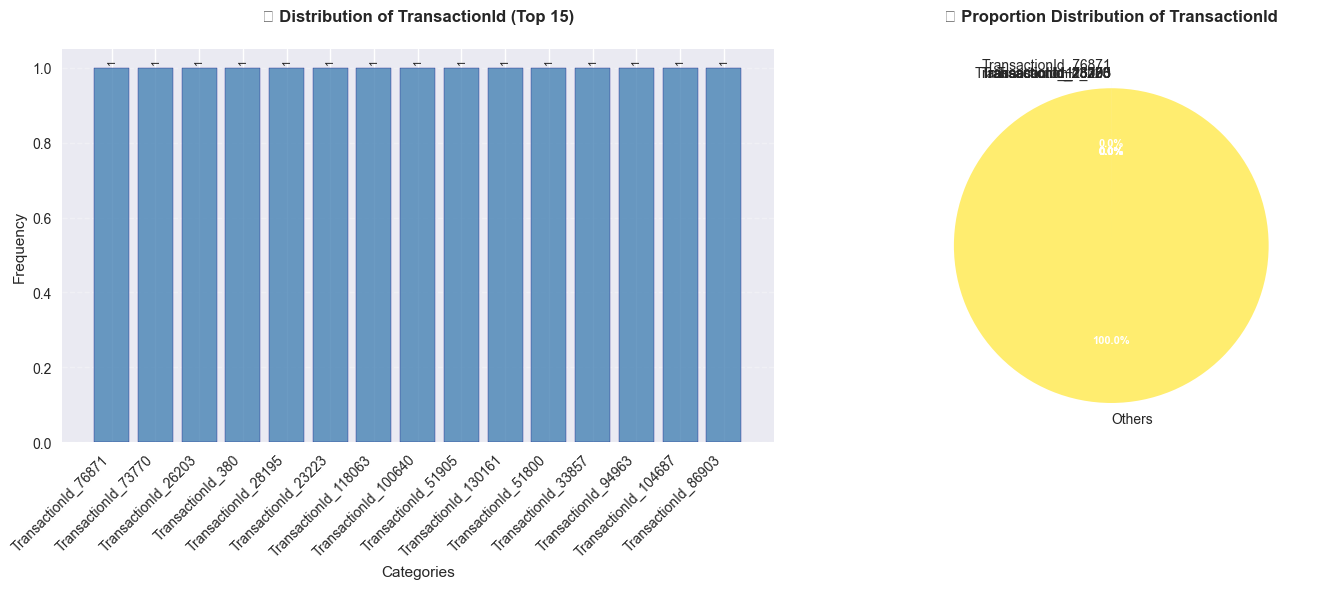


  📋 Top 10 Values Distribution:
     1. TransactionId_76871: 1 (0.0%)
     2. TransactionId_73770: 1 (0.0%)
     3. TransactionId_26203: 1 (0.0%)
     4. TransactionId_380: 1 (0.0%)
     5. TransactionId_28195: 1 (0.0%)
     6. TransactionId_23223: 1 (0.0%)
     7. TransactionId_118063: 1 (0.0%)
     8. TransactionId_100640: 1 (0.0%)
     9. TransactionId_51905: 1 (0.0%)
    10. TransactionId_130161: 1 (0.0%)
    ... 95652 other categories: 95,652 (100.0%)

📈 2. Analysis of 'BatchId':
--------------------------------------------------
  🔢 Unique values: 94,809
  🎯 Most frequent: 'BatchId_67019' (28 occurrences, 0.0%)
  ❌ Missing values: 0


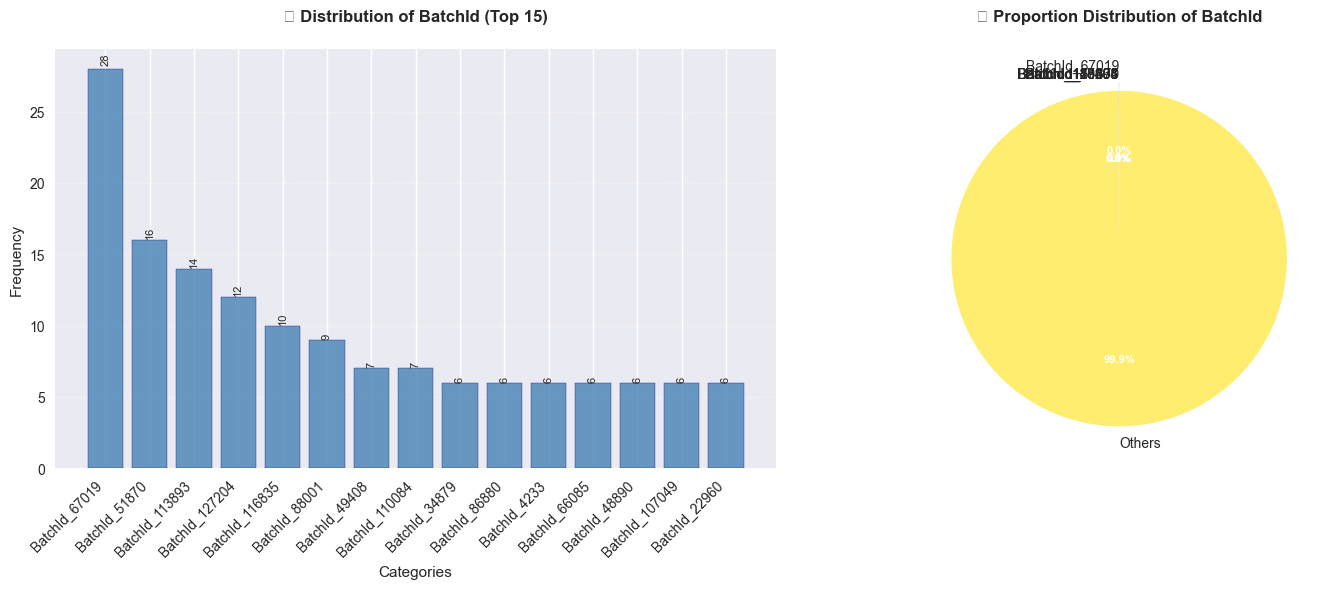


  📋 Top 10 Values Distribution:
     1. BatchId_67019: 28 (0.0%)
     2. BatchId_51870: 16 (0.0%)
     3. BatchId_113893: 14 (0.0%)
     4. BatchId_127204: 12 (0.0%)
     5. BatchId_116835: 10 (0.0%)
     6. BatchId_88001: 9 (0.0%)
     7. BatchId_49408: 7 (0.0%)
     8. BatchId_110084: 7 (0.0%)
     9. BatchId_34879: 6 (0.0%)
    10. BatchId_86880: 6 (0.0%)
    ... 94799 other categories: 95,547 (99.9%)

📈 3. Analysis of 'AccountId':
--------------------------------------------------
  🔢 Unique values: 3,633
  🎯 Most frequent: 'AccountId_4841' (30,893 occurrences, 32.3%)
  ❌ Missing values: 0


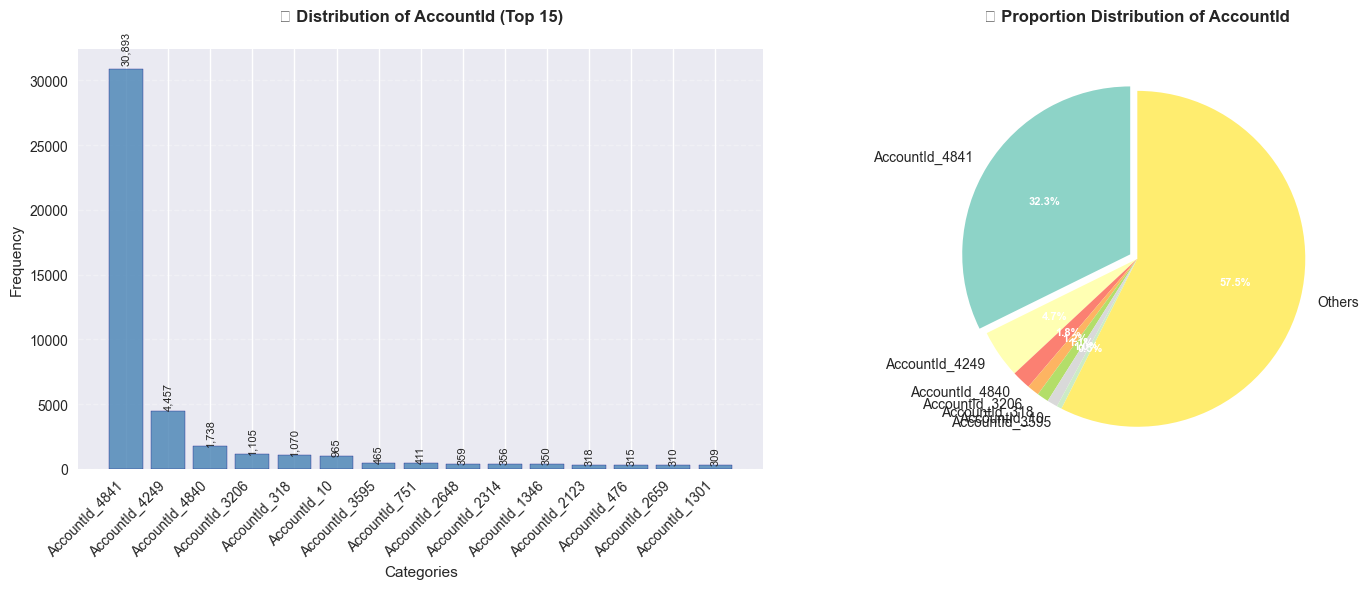


  📋 Top 10 Values Distribution:
     1. AccountId_4841: 30,893 (32.3%)
     2. AccountId_4249: 4,457 (4.7%)
     3. AccountId_4840: 1,738 (1.8%)
     4. AccountId_3206: 1,105 (1.2%)
     5. AccountId_318: 1,070 (1.1%)
     6. AccountId_10: 965 (1.0%)
     7. AccountId_3595: 465 (0.5%)
     8. AccountId_751: 411 (0.4%)
     9. AccountId_2648: 359 (0.4%)
    10. AccountId_2314: 356 (0.4%)
    ... 3623 other categories: 53,843 (56.3%)

📈 4. Analysis of 'SubscriptionId':
--------------------------------------------------
  🔢 Unique values: 3,627
  🎯 Most frequent: 'SubscriptionId_3829' (32,630 occurrences, 34.1%)
  ❌ Missing values: 0


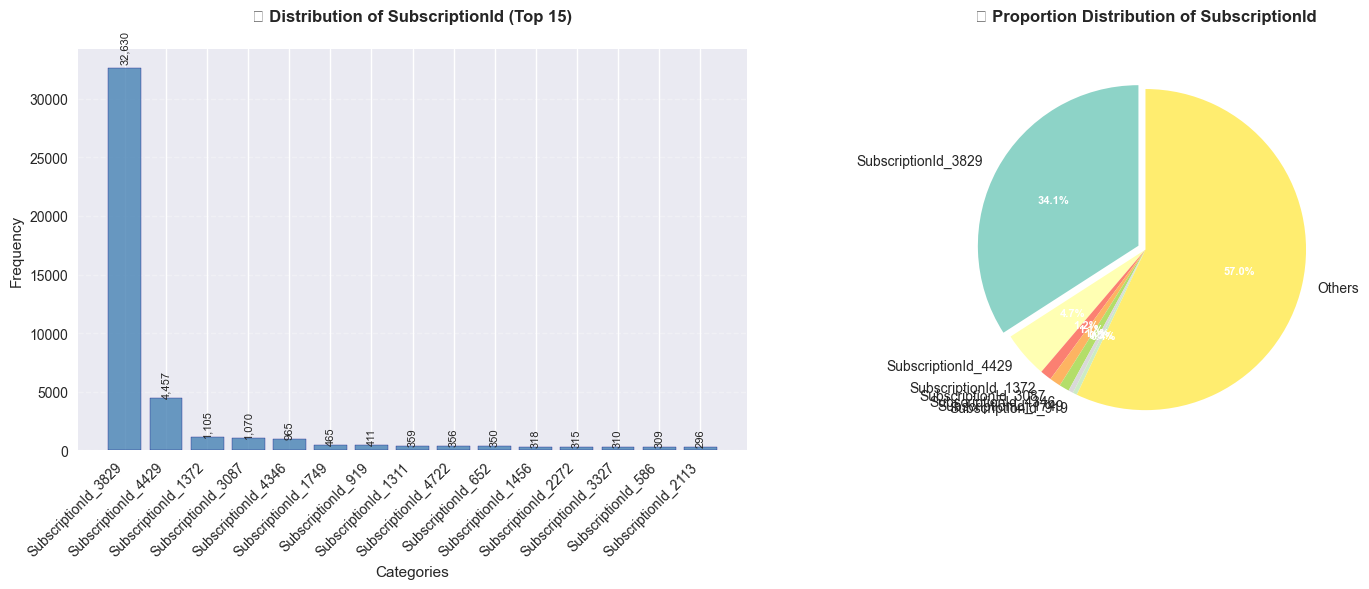


  📋 Top 10 Values Distribution:
     1. SubscriptionId_3829: 32,630 (34.1%)
     2. SubscriptionId_4429: 4,457 (4.7%)
     3. SubscriptionId_1372: 1,105 (1.2%)
     4. SubscriptionId_3087: 1,070 (1.1%)
     5. SubscriptionId_4346: 965 (1.0%)
     6. SubscriptionId_1749: 465 (0.5%)
     7. SubscriptionId_919: 411 (0.4%)
     8. SubscriptionId_1311: 359 (0.4%)
     9. SubscriptionId_4722: 356 (0.4%)
    10. SubscriptionId_652: 350 (0.4%)
    ... 3617 other categories: 53,494 (55.9%)

📈 5. Analysis of 'CustomerId':
--------------------------------------------------
  🔢 Unique values: 3,742
  🎯 Most frequent: 'CustomerId_7343' (4,091 occurrences, 4.3%)
  ❌ Missing values: 0


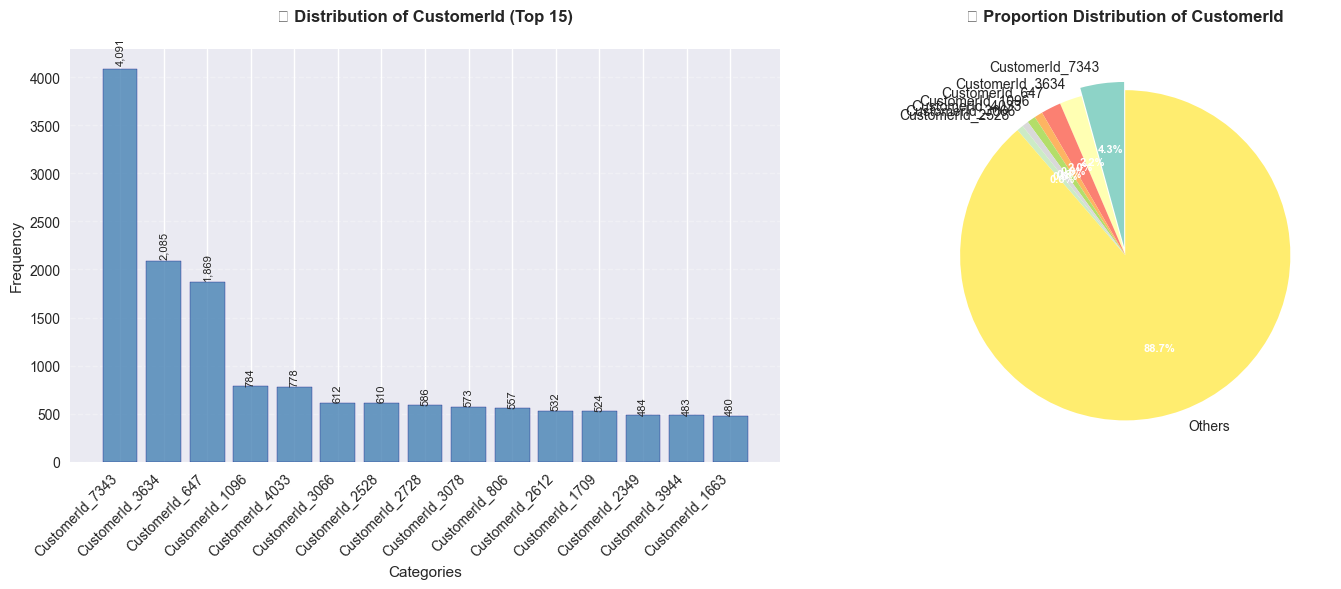


  📋 Top 10 Values Distribution:
     1. CustomerId_7343: 4,091 (4.3%)
     2. CustomerId_3634: 2,085 (2.2%)
     3. CustomerId_647: 1,869 (2.0%)
     4. CustomerId_1096: 784 (0.8%)
     5. CustomerId_4033: 778 (0.8%)
     6. CustomerId_3066: 612 (0.6%)
     7. CustomerId_2528: 610 (0.6%)
     8. CustomerId_2728: 586 (0.6%)
     9. CustomerId_3078: 573 (0.6%)
    10. CustomerId_806: 557 (0.6%)
    ... 3732 other categories: 83,117 (86.9%)

📈 6. Analysis of 'CurrencyCode':
--------------------------------------------------
  🔢 Unique values: 1
  🎯 Most frequent: 'UGX' (95,662 occurrences, 100.0%)
  ❌ Missing values: 0


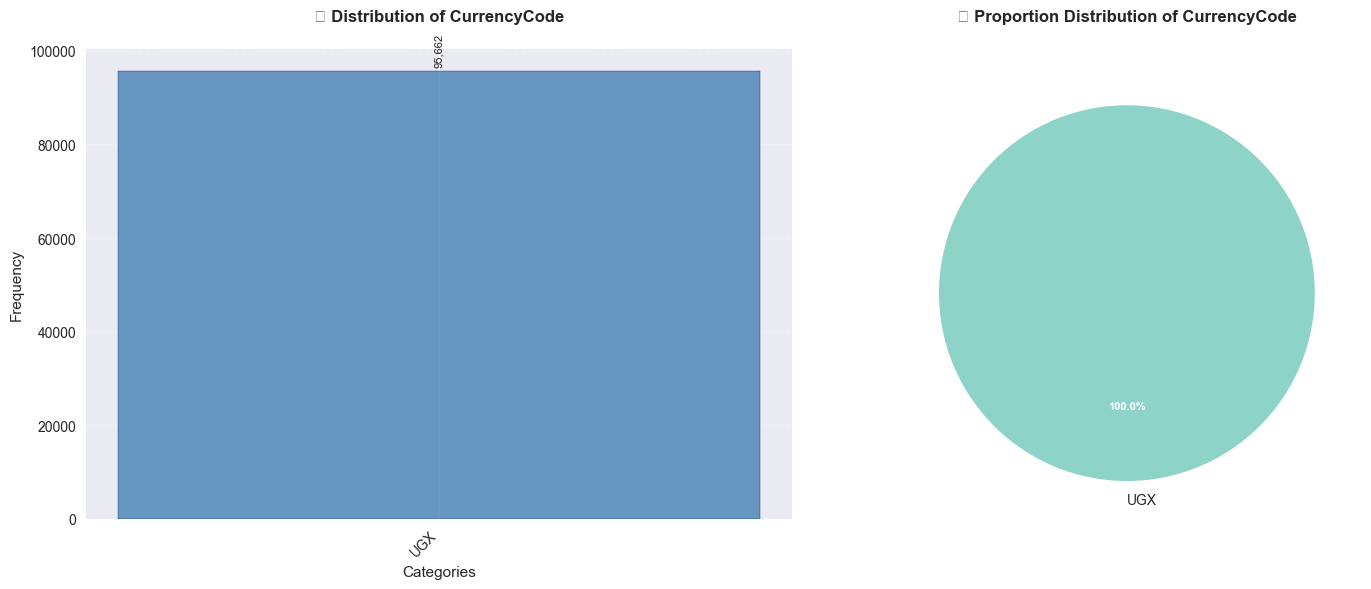


  📋 Top 10 Values Distribution:
     1. UGX: 95,662 (100.0%)


In [7]:
def analyze_categorical_distributions(df, categorical_cols):
    """
    Analyze distributions of categorical features with comprehensive visualizations
    
    Parameters:
    df (pandas.DataFrame): Input dataset
    categorical_cols (list): List of categorical column names
    """
    print("🏷️ CATEGORICAL FEATURES DISTRIBUTION ANALYSIS")
    print("="*60)
    
    if not categorical_cols:
        print("⚠️ No categorical columns found for analysis.")
        return
    
    print(f"\n📊 Analyzing {len(categorical_cols)} categorical features:")
    print(f"📋 Features: {', '.join(categorical_cols[:5])}{'...' if len(categorical_cols) > 5 else ''}")
    
    # Analyze each categorical column (limit to first 6 for space)
    analysis_cols = categorical_cols[:6]
    
    for idx, col in enumerate(analysis_cols, 1):
        print(f"\n📈 {idx}. Analysis of '{col}':")
        print("-" * 50)
        
        # Calculate value counts and statistics
        value_counts = df[col].value_counts()
        unique_count = df[col].nunique()
        null_count = df[col].isnull().sum()
        most_frequent = value_counts.index[0] if len(value_counts) > 0 else 'N/A'
        most_frequent_count = value_counts.iloc[0] if len(value_counts) > 0 else 0
        most_frequent_pct = (most_frequent_count / len(df)) * 100
        
        print(f"  🔢 Unique values: {unique_count:,}")
        print(f"  🎯 Most frequent: '{most_frequent}' ({most_frequent_count:,} occurrences, {most_frequent_pct:.1f}%)")
        print(f"  ❌ Missing values: {null_count:,}")
        
        # Create visualizations
        fig, axes = plt.subplots(1, 2, figsize=(15, 6))
        
        # Bar plot for category distribution
        if unique_count <= 20:
            # Show all categories if 20 or fewer
            ax1_data = value_counts
            title_suffix = ""
        else:
            # Show top 15 categories if more than 20
            ax1_data = value_counts.head(15)
            title_suffix = " (Top 15)"
        
        bars = axes[0].bar(range(len(ax1_data)), ax1_data.values, 
                          color='steelblue', alpha=0.8, edgecolor='navy')
        axes[0].set_title(f'📊 Distribution of {col}{title_suffix}', fontweight='bold', pad=20)
        axes[0].set_xlabel('Categories')
        axes[0].set_ylabel('Frequency')
        axes[0].set_xticks(range(len(ax1_data)))
        axes[0].set_xticklabels(ax1_data.index, rotation=45, ha='right')
        axes[0].grid(axis='y', alpha=0.3, linestyle='--')
        
        # Add value labels on bars
        for i, bar in enumerate(bars):
            height = bar.get_height()
            axes[0].text(bar.get_x() + bar.get_width()/2., height + height*0.01,
                        f'{int(height):,}', ha='center', va='bottom', fontsize=8, rotation=90)
        
        # Pie chart for proportions
        if unique_count <= 10:
            # Show all categories in pie chart if 10 or fewer
            pie_data = value_counts.values
            pie_labels = value_counts.index
        else:
            # Show top 7 + others if more than 10
            top_categories = value_counts.head(7)
            others_count = value_counts.iloc[7:].sum()
            pie_data = list(top_categories.values) + [others_count]
            pie_labels = list(top_categories.index) + ['Others']
        
        colors = plt.cm.Set3(np.linspace(0, 1, len(pie_data)))
        wedges, texts, autotexts = axes[1].pie(pie_data, labels=pie_labels, autopct='%1.1f%%', 
                                              startangle=90, colors=colors, 
                                              explode=[0.05 if i == 0 else 0 for i in range(len(pie_data))])
        axes[1].set_title(f'🥧 Proportion Distribution of {col}', fontweight='bold', pad=20)
        
        # Enhance pie chart readability
        for autotext in autotexts:
            autotext.set_color('white')
            autotext.set_fontweight('bold')
            autotext.set_fontsize(8)
        
        plt.tight_layout()
        plt.show()
        
        # Show top 10 values with percentages
        print(f"\n  📋 Top 10 Values Distribution:")
        top_10 = value_counts.head(10)
        for i, (category, count) in enumerate(top_10.items(), 1):
            percentage = (count / len(df)) * 100
            print(f"    {i:2d}. {category}: {count:,} ({percentage:.1f}%)")
        
        if len(value_counts) > 10:
            remaining_count = len(value_counts) - 10
            remaining_total = value_counts.iloc[10:].sum()
            remaining_pct = (remaining_total / len(df)) * 100
            print(f"    ... {remaining_count} other categories: {remaining_total:,} ({remaining_pct:.1f}%)")

if df is not None and categorical_cols:
    analyze_categorical_distributions(df, categorical_cols)

## 8. Feature Correlation Analysis

Analyzing correlations between numerical features to identify relationships, multicollinearity, and feature dependencies.

🔗 FEATURE CORRELATION ANALYSIS

🔢 Analyzing correlations between 5 numerical features

📊 Correlation Matrix:
----------------------------------------


,CountryCode,Amount,Value,PricingStrategy,FraudResult
CountryCode,NaN,NaN,NaN,NaN,NaN
Amount,NaN,1.000,0.990,-0.062,0.557
Value,NaN,0.990,1.000,-0.017,0.567
PricingStrategy,NaN,-0.062,-0.017,1.000,-0.034
FraudResult,NaN,0.557,0.567,-0.034,1.000


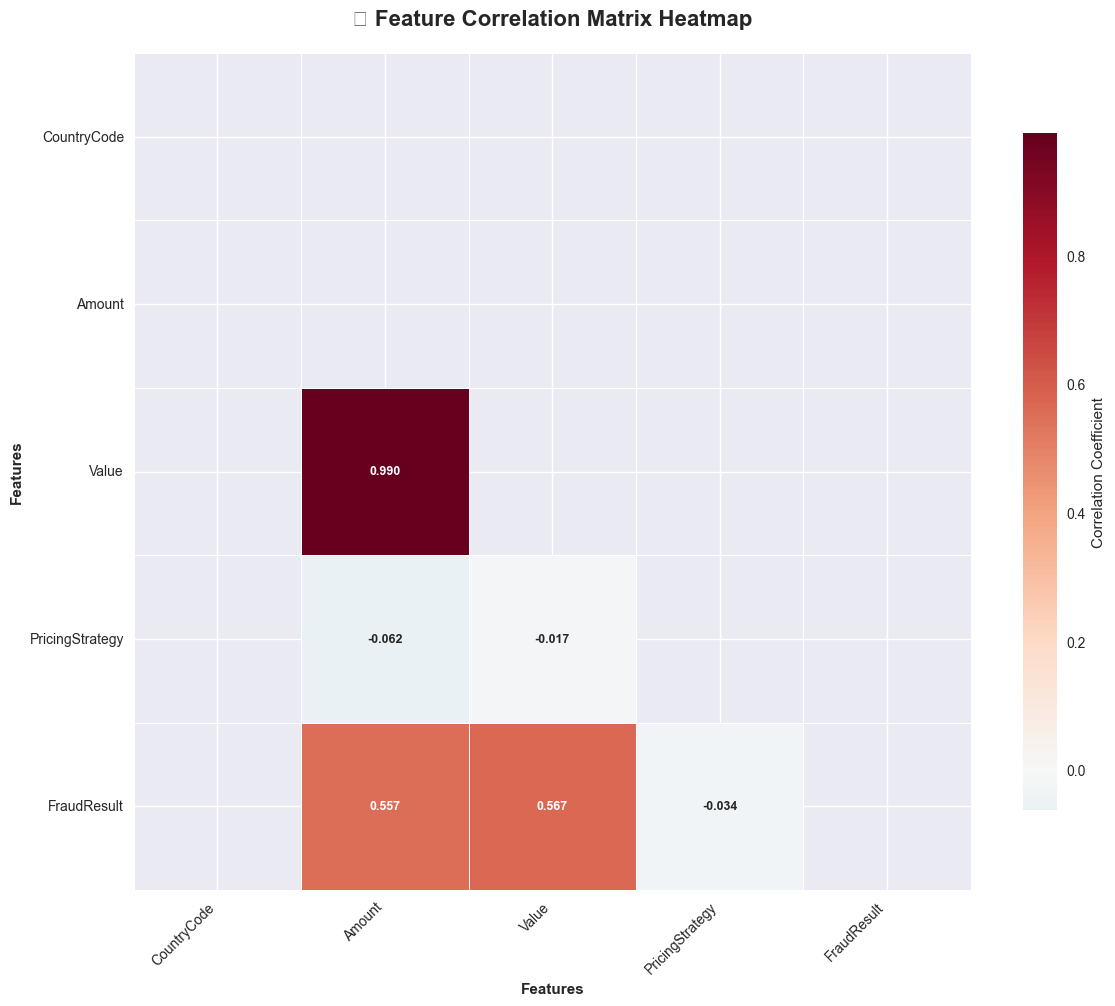


🎯 Correlation Strength Analysis:
----------------------------------------
📈 Correlation Strength Distribution:
  • Very Weak: 7 pairs (70.0%)
  • Moderate: 2 pairs (20.0%)
  • Very Strong: 1 pairs (10.0%)

🚨 HIGH CORRELATIONS (|r| > 0.7) - Potential Multicollinearity:
----------------------------------------


,Feature_1,Feature_2,Correlation,Strength,Direction
4,Amount,Value,0.989692,Very Strong,Positive



⚠️ Multicollinearity Warning:
   Found 1 feature pairs with high correlation
   Consider feature selection or dimensionality reduction

📊 NOTABLE CORRELATIONS (|r| > 0.5):
----------------------------------------


,Feature_1,Feature_2,Correlation,Strength
4,Amount,Value,0.989692,Very Strong
8,Value,FraudResult,0.566739,Moderate
6,Amount,FraudResult,0.557370,Moderate


In [8]:
def analyze_correlations(df, numerical_cols):
    """
    Analyze correlations between numerical features with advanced visualizations
    
    Parameters:
    df (pandas.DataFrame): Input dataset
    numerical_cols (list): List of numerical column names
    
    Returns:
    pandas.DataFrame: Correlation matrix
    """
    print("🔗 FEATURE CORRELATION ANALYSIS")
    print("="*60)
    
    if len(numerical_cols) < 2:
        print("⚠️ Need at least 2 numerical columns for correlation analysis.")
        return None
    
    print(f"\n🔢 Analyzing correlations between {len(numerical_cols)} numerical features")
    
    # Calculate correlation matrix
    correlation_matrix = df[numerical_cols].corr()
    
    print(f"\n📊 Correlation Matrix:")
    print("-" * 40)
    display(correlation_matrix.round(3))
    
    # Create enhanced correlation heatmap
    plt.figure(figsize=(12, 10))
    
    # Create mask for upper triangle to avoid redundancy
    mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
    
    # Generate heatmap
    sns.heatmap(correlation_matrix, 
                mask=mask,
                annot=True, 
                cmap='RdBu_r', 
                center=0,
                square=True, 
                fmt='.3f',
                cbar_kws={"shrink": 0.8, "label": "Correlation Coefficient"},
                linewidths=0.5,
                annot_kws={'fontsize': 9, 'fontweight': 'bold'})
    
    plt.title('🔥 Feature Correlation Matrix Heatmap', fontweight='bold', fontsize=16, pad=20)
    plt.xlabel('Features', fontweight='bold')
    plt.ylabel('Features', fontweight='bold')
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()
    
    # Identify and analyze strong correlations
    print(f"\n🎯 Correlation Strength Analysis:")
    print("-" * 40)
    
    # Find correlation pairs
    correlation_pairs = []
    
    for i in range(len(correlation_matrix.columns)):
        for j in range(i+1, len(correlation_matrix.columns)):
            corr_val = correlation_matrix.iloc[i, j]
            correlation_pairs.append({
                'Feature_1': correlation_matrix.columns[i],
                'Feature_2': correlation_matrix.columns[j],
                'Correlation': corr_val,
                'Abs_Correlation': abs(corr_val),
                'Strength': 'Very Strong' if abs(corr_val) >= 0.9 else 
                           'Strong' if abs(corr_val) >= 0.7 else
                           'Moderate' if abs(corr_val) >= 0.5 else
                           'Weak' if abs(corr_val) >= 0.3 else 'Very Weak',
                'Direction': 'Positive' if corr_val > 0 else 'Negative'
            })
    
    corr_df = pd.DataFrame(correlation_pairs).sort_values('Abs_Correlation', ascending=False)
    
    # Display correlation summary
    strength_counts = corr_df['Strength'].value_counts()
    print(f"📈 Correlation Strength Distribution:")
    for strength, count in strength_counts.items():
        percentage = (count / len(corr_df)) * 100
        print(f"  • {strength}: {count} pairs ({percentage:.1f}%)")
    
    # Show high correlations (|r| > 0.7)
    high_corr = corr_df[corr_df['Abs_Correlation'] > 0.7]
    
    if len(high_corr) > 0:
        print(f"\n🚨 HIGH CORRELATIONS (|r| > 0.7) - Potential Multicollinearity:")
        print("-" * 40)
        display(high_corr[['Feature_1', 'Feature_2', 'Correlation', 'Strength', 'Direction']].head(10))
        
        print(f"\n⚠️ Multicollinearity Warning:")
        print(f"   Found {len(high_corr)} feature pairs with high correlation")
        print(f"   Consider feature selection or dimensionality reduction")
    else:
        print(f"\n✅ No high correlations found (|r| > 0.7)")
        print(f"   Low multicollinearity risk detected")
    
    # Show moderate to strong correlations for insights
    moderate_strong_corr = corr_df[corr_df['Abs_Correlation'] > 0.5]
    
    if len(moderate_strong_corr) > 0:
        print(f"\n📊 NOTABLE CORRELATIONS (|r| > 0.5):")
        print("-" * 40)
        display(moderate_strong_corr[['Feature_1', 'Feature_2', 'Correlation', 'Strength']].head(15))
    
    return correlation_matrix

if df is not None and len(numerical_cols) >= 2:
    correlation_matrix = analyze_correlations(df, numerical_cols)
else:
    correlation_matrix = None

## 9. Temporal Pattern Analysis

Analyzing time-based patterns in the data to understand temporal trends, seasonality, and time-dependent behaviors.

🕐 TEMPORAL PATTERN ANALYSIS

🔍 Searching for temporal features...
📅 Found 1 potential time columns: ['TransactionStartTime']

📈 Analyzing temporal patterns in 'TransactionStartTime':
--------------------------------------------------
  🔄 Converted TransactionStartTime from object to datetime
  ✅ Valid dates: 95,662 (100.0%)

  📊 Temporal Statistics:
    • Date range: 2018-11-15 02:18:49+00:00 to 2019-02-13 10:01:28+00:00
    • Time span: 90 days (0.2 years)
    • Total transactions: 95,662
    • Average daily transactions: 1062.9


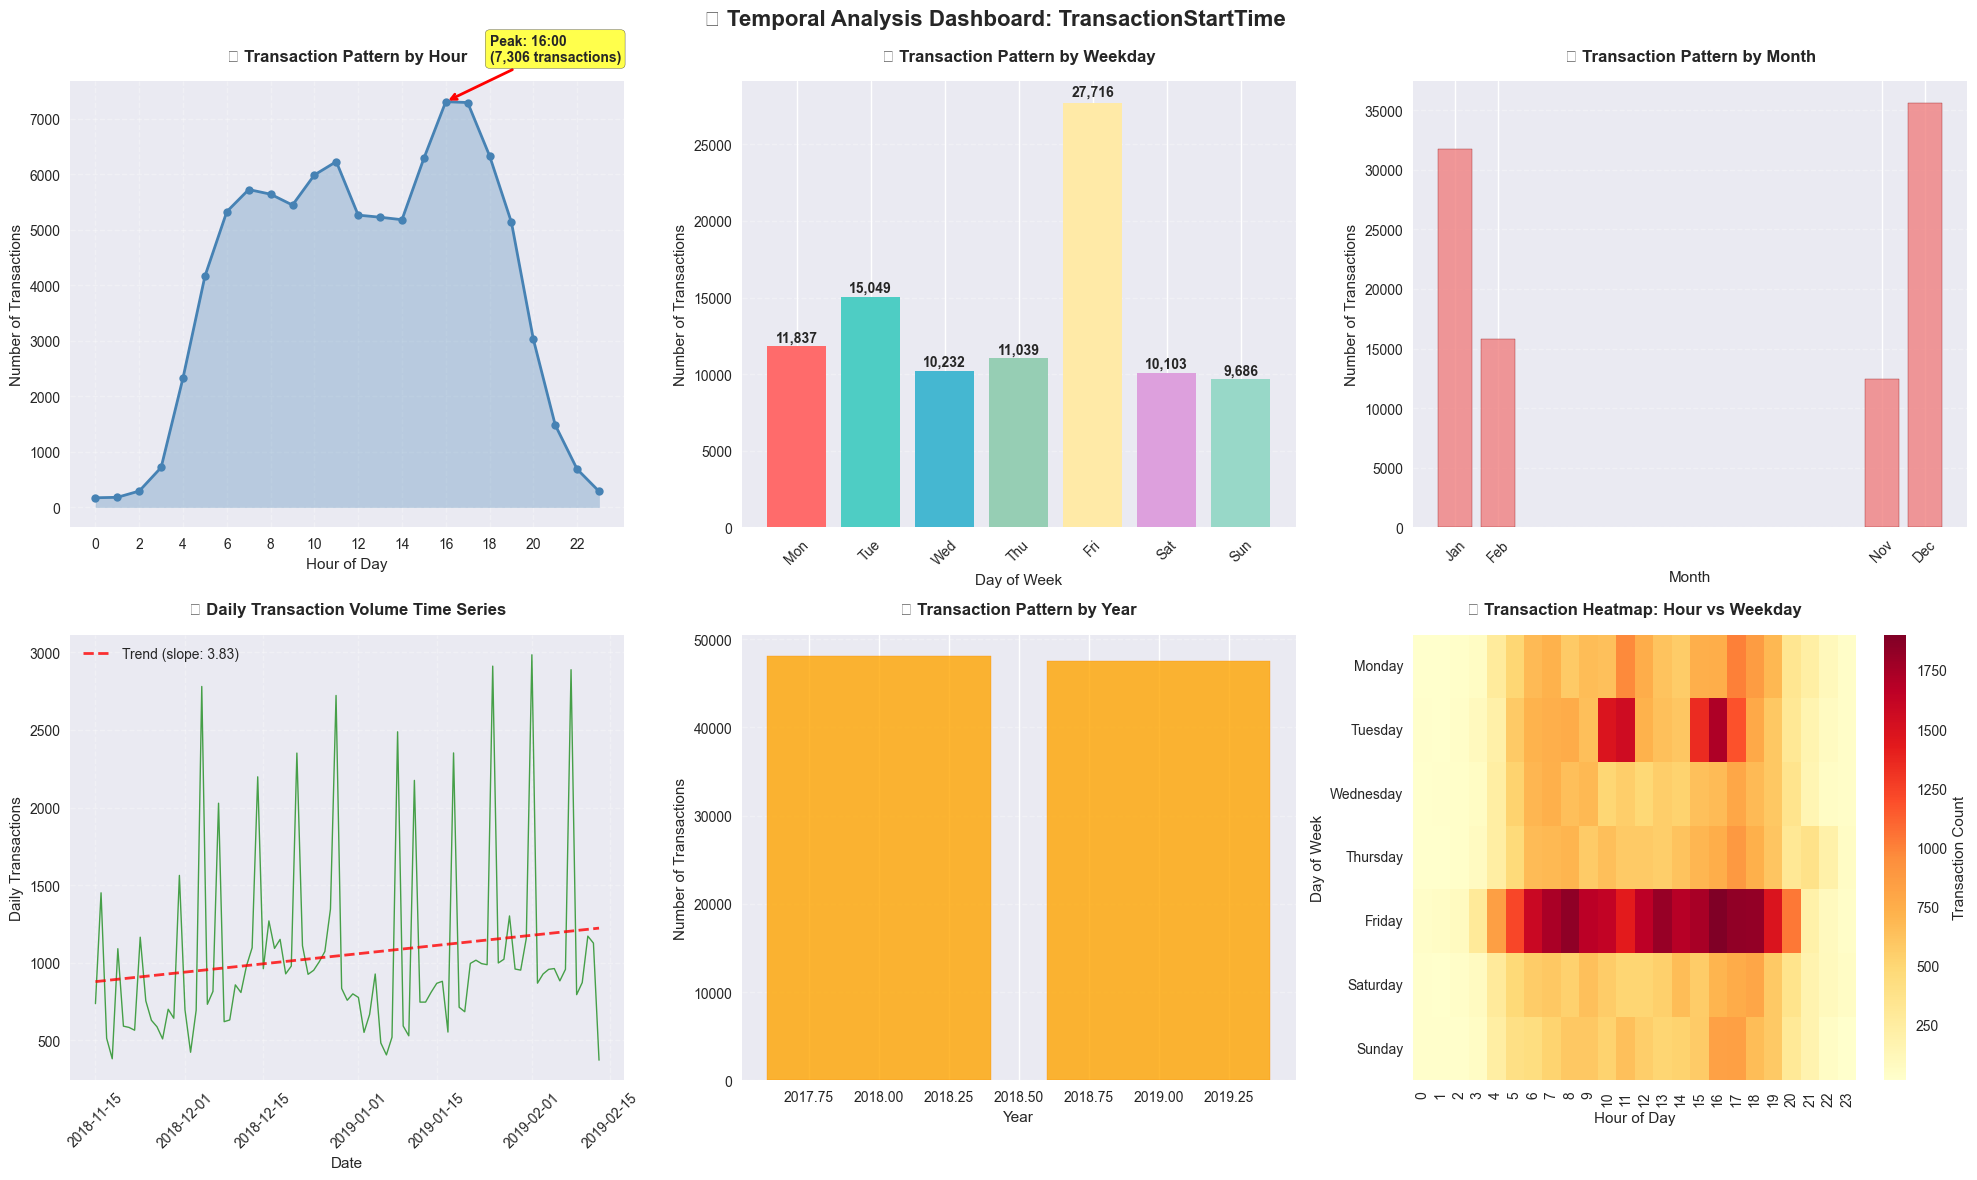


  🎯 Key Temporal Insights:
    • Peak activity hour: 16:00
    • Lowest activity hour: 0:00
    • Peak activity day: Friday
    • Lowest activity day: Sunday
    • Recent trend: increasing (last 7 days avg: 1169.4 vs overall: 1051.2)


In [9]:
def analyze_time_patterns(df):
    """
    Analyze time-based patterns and temporal trends in the data
    
    Parameters:
    df (pandas.DataFrame): Input dataset
    """
    print("🕐 TEMPORAL PATTERN ANALYSIS")
    print("="*60)
    
    # Identify time-related columns
    time_cols = [col for col in df.columns if any(keyword in col.lower() 
                for keyword in ['time', 'date', 'timestamp', 'created', 'updated'])]
    
    print(f"\n🔍 Searching for temporal features...")
    print(f"📅 Found {len(time_cols)} potential time columns: {time_cols if time_cols else 'None'}")
    
    if not time_cols:
        print("\n⚠️ No time-related columns detected in the dataset.")
        print("   Consider adding temporal features if transaction timestamps are available.")
        return
    
    for time_col in time_cols:
        print(f"\n📈 Analyzing temporal patterns in '{time_col}':")
        print("-" * 50)
        
        try:
            # Convert to datetime if not already
            original_dtype = df[time_col].dtype
            if df[time_col].dtype == 'object':
                df[time_col] = pd.to_datetime(df[time_col], errors='coerce')
                print(f"  🔄 Converted {time_col} from {original_dtype} to datetime")
            
            # Check for successful conversion
            valid_dates = df[time_col].notna().sum()
            invalid_dates = df[time_col].isna().sum()
            
            if valid_dates == 0:
                print(f"  ❌ No valid dates found in {time_col}")
                continue
            
            print(f"  ✅ Valid dates: {valid_dates:,} ({valid_dates/len(df)*100:.1f}%)")
            if invalid_dates > 0:
                print(f"  ⚠️ Invalid dates: {invalid_dates:,} ({invalid_dates/len(df)*100:.1f}%)")
            
            # Basic temporal statistics
            date_stats = df[time_col].describe()
            time_span = (df[time_col].max() - df[time_col].min()).days
            
            print(f"\n  📊 Temporal Statistics:")
            print(f"    • Date range: {df[time_col].min()} to {df[time_col].max()}")
            print(f"    • Time span: {time_span:,} days ({time_span/365.25:.1f} years)")
            print(f"    • Total transactions: {valid_dates:,}")
            print(f"    • Average daily transactions: {valid_dates/max(time_span, 1):.1f}")
            
            # Extract temporal components
            df_temp = df[df[time_col].notna()].copy()
            df_temp['year'] = df_temp[time_col].dt.year
            df_temp['month'] = df_temp[time_col].dt.month
            df_temp['day'] = df_temp[time_col].dt.day
            df_temp['hour'] = df_temp[time_col].dt.hour
            df_temp['weekday'] = df_temp[time_col].dt.day_name()
            df_temp['date'] = df_temp[time_col].dt.date
            
            # Create comprehensive temporal visualizations
            fig, axes = plt.subplots(2, 3, figsize=(20, 12))
            fig.suptitle(f'🕐 Temporal Analysis Dashboard: {time_col}', fontsize=16, fontweight='bold', y=0.98)
            
            # 1. Hourly pattern
            if 'hour' in df_temp.columns and df_temp['hour'].notna().any():
                hourly_counts = df_temp['hour'].value_counts().sort_index()
                axes[0, 0].plot(hourly_counts.index, hourly_counts.values, 
                               marker='o', linewidth=2, markersize=6, color='steelblue')
                axes[0, 0].fill_between(hourly_counts.index, hourly_counts.values, alpha=0.3, color='steelblue')
                axes[0, 0].set_title('📅 Transaction Pattern by Hour', fontweight='bold', pad=15)
                axes[0, 0].set_xlabel('Hour of Day')
                axes[0, 0].set_ylabel('Number of Transactions')
                axes[0, 0].grid(alpha=0.3, linestyle='--')
                axes[0, 0].set_xticks(range(0, 24, 2))
                
                # Highlight peak hours
                peak_hour = hourly_counts.idxmax()
                peak_count = hourly_counts.max()
                axes[0, 0].annotate(f'Peak: {peak_hour}:00\n({peak_count:,} transactions)', 
                                   xy=(peak_hour, peak_count), 
                                   xytext=(peak_hour+2, peak_count*1.1),
                                   arrowprops=dict(arrowstyle='->', color='red', lw=2),
                                   bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.7),
                                   fontweight='bold')
            
            # 2. Weekly pattern
            if 'weekday' in df_temp.columns:
                weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
                weekday_counts = df_temp['weekday'].value_counts().reindex(weekday_order, fill_value=0)
                
                bars = axes[0, 1].bar(range(len(weekday_counts)), weekday_counts.values, 
                                     color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7', '#DDA0DD', '#98D8C8'])
                axes[0, 1].set_title('📊 Transaction Pattern by Weekday', fontweight='bold', pad=15)
                axes[0, 1].set_xlabel('Day of Week')
                axes[0, 1].set_ylabel('Number of Transactions')
                axes[0, 1].set_xticks(range(len(weekday_counts)))
                axes[0, 1].set_xticklabels([day[:3] for day in weekday_counts.index], rotation=45)
                axes[0, 1].grid(axis='y', alpha=0.3, linestyle='--')
                
                # Add value labels on bars
                for i, bar in enumerate(bars):
                    height = bar.get_height()
                    axes[0, 1].text(bar.get_x() + bar.get_width()/2., height + height*0.01,
                                   f'{int(height):,}', ha='center', va='bottom', fontweight='bold')
            
            # 3. Monthly pattern
            if 'month' in df_temp.columns:
                monthly_counts = df_temp['month'].value_counts().sort_index()
                month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                              'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
                
                axes[0, 2].bar(monthly_counts.index, monthly_counts.values, 
                              color='lightcoral', alpha=0.8, edgecolor='darkred')
                axes[0, 2].set_title('📅 Transaction Pattern by Month', fontweight='bold', pad=15)
                axes[0, 2].set_xlabel('Month')
                axes[0, 2].set_ylabel('Number of Transactions')
                axes[0, 2].set_xticks(monthly_counts.index)
                axes[0, 2].set_xticklabels([month_names[i-1] for i in monthly_counts.index], rotation=45)
                axes[0, 2].grid(axis='y', alpha=0.3, linestyle='--')
            
            # 4. Daily transaction volume time series
            daily_counts = df_temp['date'].value_counts().sort_index()
            axes[1, 0].plot(daily_counts.index, daily_counts.values, 
                           linewidth=1, alpha=0.7, color='green')
            axes[1, 0].set_title('📈 Daily Transaction Volume Time Series', fontweight='bold', pad=15)
            axes[1, 0].set_xlabel('Date')
            axes[1, 0].set_ylabel('Daily Transactions')
            axes[1, 0].tick_params(axis='x', rotation=45)
            axes[1, 0].grid(alpha=0.3, linestyle='--')
            
            # Add trend line
            if len(daily_counts) > 1:
                z = np.polyfit(range(len(daily_counts)), daily_counts.values, 1)
                p = np.poly1d(z)
                axes[1, 0].plot(daily_counts.index, p(range(len(daily_counts))), 
                               "r--", alpha=0.8, linewidth=2, label=f'Trend (slope: {z[0]:.2f})')
                axes[1, 0].legend()
            
            # 5. Transaction distribution by year (if multiple years)
            if 'year' in df_temp.columns and df_temp['year'].nunique() > 1:
                yearly_counts = df_temp['year'].value_counts().sort_index()
                axes[1, 1].bar(yearly_counts.index, yearly_counts.values, 
                              color='orange', alpha=0.8, edgecolor='darkorange')
                axes[1, 1].set_title('📊 Transaction Pattern by Year', fontweight='bold', pad=15)
                axes[1, 1].set_xlabel('Year')
                axes[1, 1].set_ylabel('Number of Transactions')
                axes[1, 1].grid(axis='y', alpha=0.3, linestyle='--')
            else:
                axes[1, 1].text(0.5, 0.5, 'Single Year Data\nNo Yearly Comparison Available', 
                                ha='center', va='center', transform=axes[1, 1].transAxes,
                                fontsize=12, bbox=dict(boxstyle='round', facecolor='lightgray', alpha=0.5))
                axes[1, 1].set_title('📊 Yearly Analysis', fontweight='bold', pad=15)
            
            # 6. Heat map of hour vs weekday
            if 'hour' in df_temp.columns and 'weekday' in df_temp.columns:
                hour_weekday_pivot = df_temp.groupby(['weekday', 'hour']).size().unstack(fill_value=0)
                hour_weekday_pivot = hour_weekday_pivot.reindex(weekday_order)
                
                sns.heatmap(hour_weekday_pivot, annot=False, cmap='YlOrRd', 
                           cbar_kws={'label': 'Transaction Count'}, ax=axes[1, 2])
                axes[1, 2].set_title('🔥 Transaction Heatmap: Hour vs Weekday', fontweight='bold', pad=15)
                axes[1, 2].set_xlabel('Hour of Day')
                axes[1, 2].set_ylabel('Day of Week')
            
            plt.tight_layout()
            plt.show()
            
            # Generate temporal insights
            print(f"\n  🎯 Key Temporal Insights:")
            if 'hour' in df_temp.columns and df_temp['hour'].notna().any():
                peak_hour = df_temp['hour'].value_counts().idxmax()
                low_hour = df_temp['hour'].value_counts().idxmin()
                print(f"    • Peak activity hour: {peak_hour}:00")
                print(f"    • Lowest activity hour: {low_hour}:00")
            
            if 'weekday' in df_temp.columns:
                peak_day = df_temp['weekday'].value_counts().idxmax()
                low_day = df_temp['weekday'].value_counts().idxmin()
                print(f"    • Peak activity day: {peak_day}")
                print(f"    • Lowest activity day: {low_day}")
            
            if len(daily_counts) > 7:
                recent_avg = daily_counts.tail(7).mean()
                overall_avg = daily_counts.mean()
                trend = "increasing" if recent_avg > overall_avg else "decreasing" if recent_avg < overall_avg else "stable"
                print(f"    • Recent trend: {trend} (last 7 days avg: {recent_avg:.1f} vs overall: {overall_avg:.1f})")
            
        except Exception as e:
            print(f"  ❌ Error analyzing {time_col}: {str(e)}")
            continue

if df is not None:
    analyze_time_patterns(df)

## 10. Executive Summary and Key Insights

Consolidating all findings into actionable insights and strategic recommendations for credit risk modeling and business decisions.

In [10]:
def summarize_key_insights(df, numerical_cols, categorical_cols, correlation_matrix=None):
    """
    Generate comprehensive executive summary with top actionable insights
    
    Parameters:
    df (pandas.DataFrame): Input dataset
    numerical_cols (list): List of numerical column names
    categorical_cols (list): List of categorical column names
    correlation_matrix (pandas.DataFrame): Correlation matrix if available
    
    Returns:
    list: List of key insights
    """
    print("🎯 EXECUTIVE SUMMARY: KEY INSIGHTS FROM EDA")
    print("="*70)
    
    insights = []
    
    # Insight 1: Data Quality and Infrastructure Assessment
    total_cells = df.shape[0] * df.shape[1]
    missing_cells = df.isnull().sum().sum()
    missing_percentage = (missing_cells / total_cells) * 100
    
    # Data span analysis
    datetime_cols = df.select_dtypes(include=['datetime64']).columns
    date_range_info = "N/A"
    if len(datetime_cols) > 0:
        min_date = df[datetime_cols].min().min()
        max_date = df[datetime_cols].max().max()
        if pd.notna(min_date) and pd.notna(max_date):
            days_span = (max_date - min_date).days
            date_range_info = f"{min_date.strftime('%Y-%m-%d')} to {max_date.strftime('%Y-%m-%d')} ({days_span:,} days)"
    
    insights.append(f"**1. 📊 Data Quality & Infrastructure Assessment:**\n"
                   f"   • Dataset scale: {df.shape[0]:,} transactions × {df.shape[1]} features\n"
                   f"   • Data completeness: {100-missing_percentage:.1f}% (Missing: {missing_percentage:.1f}%)\n"
                   f"   • Temporal coverage: {date_range_info}\n"
                   f"   • Memory footprint: {df.memory_usage(deep=True).sum() / 1024**2:.1f} MB\n"
                   f"   • Quality rating: {'Excellent' if missing_percentage < 5 else 'Good' if missing_percentage < 15 else 'Fair' if missing_percentage < 30 else 'Poor'}")
    
    # Insight 2: Customer Behavior and Transaction Patterns
    customer_analysis = "Not available (no CustomerId column found)"
    amount_analysis = "Not available (no Amount column found)"
    
    if 'CustomerId' in df.columns:
        unique_customers = df['CustomerId'].nunique()
        avg_transactions_per_customer = df.shape[0] / unique_customers if unique_customers > 0 else 0
        customer_frequency = df['CustomerId'].value_counts()
        top_10pct_customers = customer_frequency.quantile(0.9)
        
        customer_analysis = (f"{unique_customers:,} unique customers\n"
                           f"   • Average transactions per customer: {avg_transactions_per_customer:.1f}\n"
                           f"   • Top 10% customers have ≥{top_10pct_customers:.0f} transactions\n"
                           f"   • Customer engagement: {'High diversity' if avg_transactions_per_customer < 10 else 'Concentrated activity'}")
    
    if 'Amount' in df.columns:
        amount_stats = df['Amount'].describe()
        cv = amount_stats['std'] / amount_stats['mean'] if amount_stats['mean'] != 0 else 0
        
        amount_analysis = (f"Average: ${amount_stats['mean']:.2f}, Median: ${amount_stats['50%']:.2f}\n"
                         f"   • Range: ${amount_stats['min']:.2f} - ${amount_stats['max']:,.2f}\n"
                         f"   • Variability (CV): {cv:.2f} ({'High' if cv > 1 else 'Moderate' if cv > 0.5 else 'Low'} variance)\n"
                         f"   • Distribution: {'Right-skewed' if df['Amount'].skew() > 1 else 'Moderately skewed' if df['Amount'].skew() > 0 else 'Left-skewed'}")
    
    insights.append(f"**2. 👥 Customer Behavior & Transaction Intelligence:**\n"
                   f"   • Customer base: {customer_analysis}\n"
                   f"   • Transaction amounts: {amount_analysis}")
    
    # Insight 3: Feature Relationships and Modeling Implications
    feature_relationship_analysis = "Correlation analysis not performed"
    
    if correlation_matrix is not None and len(correlation_matrix) > 1:
        # Calculate correlation statistics
        corr_values = []
        for i in range(len(correlation_matrix.columns)):
            for j in range(i+1, len(correlation_matrix.columns)):
                corr_values.append(abs(correlation_matrix.iloc[i, j]))
        
        if corr_values:
            max_corr = max(corr_values)
            avg_corr = np.mean(corr_values)
            high_corr_count = sum(1 for x in corr_values if x > 0.7)
            moderate_corr_count = sum(1 for x in corr_values if 0.5 <= x <= 0.7)
            
            multicollinearity_risk = "High" if high_corr_count > 0 else "Moderate" if moderate_corr_count > 2 else "Low"
            
            feature_relationship_analysis = (f"Max correlation: {max_corr:.3f}, Average: {avg_corr:.3f}\n"
                                            f"   • High correlations (>0.7): {high_corr_count} pairs\n"
                                            f"   • Moderate correlations (0.5-0.7): {moderate_corr_count} pairs\n"
                                            f"   • Multicollinearity risk: {multicollinearity_risk}")
    
    insights.append(f"**3. 🔗 Feature Engineering & Modeling Readiness:**\n"
                   f"   • Feature composition: {len(numerical_cols)} numerical, {len(categorical_cols)} categorical\n"
                   f"   • Correlation insights: {feature_relationship_analysis}\n"
                   f"   • Modeling complexity: {'High' if len(numerical_cols) + len(categorical_cols) > 50 else 'Moderate' if len(numerical_cols) + len(categorical_cols) > 20 else 'Low'}")
    
    # Insight 4: Risk Assessment and Business Context
    risk_indicators = []
    
    # Check for fraud indicators
    if 'FraudResult' in df.columns:
        fraud_rate = df['FraudResult'].mean() * 100
        risk_indicators.append(f"Fraud rate: {fraud_rate:.2f}%")
    
    # Check for risk-related columns
    risk_columns = [col for col in df.columns if any(keyword in col.lower() 
                   for keyword in ['risk', 'score', 'rating', 'default', 'delinquent'])]
    
    if risk_columns:
        risk_indicators.append(f"Risk-related features available: {', '.join(risk_columns[:3])}{'...' if len(risk_columns) > 3 else ''}")
    
    # Assess data richness for credit modeling
    behavioral_features = len([col for col in df.columns if any(keyword in col.lower() 
                              for keyword in ['amount', 'frequency', 'balance', 'transaction', 'payment'])])
    
    credit_modeling_readiness = "High" if behavioral_features >= 5 else "Moderate" if behavioral_features >= 3 else "Limited"
    
    risk_assessment = f"Credit modeling readiness: {credit_modeling_readiness}\n"
    if risk_indicators:
        risk_assessment += f"   • {' | '.join(risk_indicators)}\n"
    risk_assessment += f"   • Behavioral features available: {behavioral_features}\n"
    risk_assessment += f"   • Proxy target feasibility: {'High' if 'CustomerId' in df.columns and behavioral_features >= 3 else 'Moderate' if behavioral_features >= 2 else 'Low'}"
    
    insights.append(f"**4. ⚠️ Credit Risk Assessment & Business Impact:**\n"
                   f"   • {risk_assessment}")
    
    # Insight 5: Strategic Recommendations
    recommendations = []
    
    # Data quality recommendations
    if missing_percentage > 10:
        recommendations.append("Implement data quality improvement initiatives")
    
    # Feature engineering recommendations
    if 'CustomerId' in df.columns:
        recommendations.append("Develop RFM (Recency, Frequency, Monetary) customer segmentation")
    
    if any('time' in col.lower() or 'date' in col.lower() for col in df.columns):
        recommendations.append("Create temporal behavioral features (seasonality, trends)")
    
    # Modeling recommendations
    if correlation_matrix is not None and len([x for x in corr_values if x > 0.7]) > 0:
        recommendations.append("Apply dimensionality reduction techniques for multicollinearity")
    
    if len(categorical_cols) > 5:
        recommendations.append("Implement Weight of Evidence (WoE) encoding for categorical variables")
    
    # Business recommendations
    if 'Amount' in df.columns and df['Amount'].skew() > 2:
        recommendations.append("Consider transaction amount segmentation strategies")
    
    recommendations.append("Develop proxy target using unsupervised customer risk segmentation")
    
    insights.append(f"**5. 🚀 Strategic Recommendations & Next Steps:**\n"
                   + "\n".join([f"   • {rec}" for rec in recommendations]))
    
    # Display all insights
    print("\n" + "🎯 KEY BUSINESS INSIGHTS:")
    print("=" * 70)
    
    for i, insight in enumerate(insights, 1):
        print(f"\n{insight}")
        if i < len(insights):
            print()
    
    # Next Steps Section
    print("\n" + "=" * 80)
    print("🛠️  IMMEDIATE ACTION PLAN FOR FEATURE ENGINEERING:")
    print("=" * 80)
    
    action_items = [
        "1. 🎯 Customer Segmentation: Create RFM analysis and behavioral clusters",
        "2. ⏰ Temporal Features: Engineer time-based patterns and seasonality indicators",
        "3. 📊 Aggregate Features: Develop customer-level summary statistics and ratios",
        "4. 🔄 Categorical Encoding: Apply WoE transformation and target encoding",
        "5. 🎨 Proxy Target Creation: Design unsupervised risk scoring methodology",
        "6. 🧪 Feature Selection: Implement correlation analysis and feature importance ranking",
        "7. 📈 Model Development: Build baseline credit risk prediction models",
        "8. ✅ Validation Framework: Establish model performance and business impact metrics"
    ]
    
    for item in action_items:
        print(f"   {item}")
    
    # Success Metrics
    print("\n" + "📊 SUCCESS METRICS TO TRACK:")
    print("-" * 50)
    success_metrics = [
        "• Model Performance: AUC-ROC > 0.75, Precision-Recall balance",
        "• Feature Quality: Information Value (IV) > 0.1 for key features",
        "• Business Impact: Risk differentiation across customer segments",
        "• Data Quality: <5% missing values in engineered features",
        "• Operational Efficiency: Model inference time <100ms"
    ]
    
    for metric in success_metrics:
        print(f"   {metric}")
    
    return insights

# Generate comprehensive insights summary
if df is not None:
    insights = summarize_key_insights(df, numerical_cols, categorical_cols, 
                                    correlation_matrix if 'correlation_matrix' in locals() else None)

print("\n" + "🎉" * 20)
print("🏆 EXPLORATORY DATA ANALYSIS COMPLETED SUCCESSFULLY!")
print("🎉" * 20)
print("\n📝 Review the comprehensive insights above and proceed to feature engineering.")
print("💼 This analysis provides a solid foundation for credit risk model development.")
print("🚀 Ready to transform insights into actionable machine learning features!")

🎯 EXECUTIVE SUMMARY: KEY INSIGHTS FROM EDA

🎯 KEY BUSINESS INSIGHTS:

**1. 📊 Data Quality & Infrastructure Assessment:**
   • Dataset scale: 95,662 transactions × 16 features
   • Data completeness: 100.0% (Missing: 0.0%)
   • Temporal coverage: N/A
   • Memory footprint: 60.9 MB
   • Quality rating: Excellent


**2. 👥 Customer Behavior & Transaction Intelligence:**
   • Customer base: 3,742 unique customers
   • Average transactions per customer: 25.6
   • Top 10% customers have ≥58 transactions
   • Customer engagement: Concentrated activity
   • Transaction amounts: Average: $6717.85, Median: $1000.00
   • Range: $-1000000.00 - $9,880,000.00
   • Variability (CV): 18.36 (High variance)
   • Distribution: Right-skewed


**3. 🔗 Feature Engineering & Modeling Readiness:**
   • Feature composition: 5 numerical, 11 categorical
   • Correlation insights: Max correlation: nan, Average: nan
   • High correlations (>0.7): 1 pairs
   • Moderate correlations (0.5-0.7): 2 pairs
   • Multicollin